# 고객의 소비등급별 인사이트 발굴

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np

In [2]:
# pd.set_option('display.max_rows', None)
# pd.options.display.max_rows = 60
pd.set_option('display.max_columns', None)

In [ ]:
# import matplotlib.font_manager as fm
# fonts = [font.name for font in fm.fontManager.ttflist]
# fonts

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

## Raw data 탐색

In [4]:
df = pd.read_csv('new_retail_data.csv')
df[:5]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

### 결측치 처리

전체 데이터에서 결측치가 자치하는 양이 상대적으로 매우 적으므로, 결측치가 있는 행은 삭제하기로 한다.

In [31]:
df_notnull = df.dropna(axis=0, how='any')
df_notnull[:3]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [ ]:
# 결측치 처리 : 데이터형이 float64 이면 0.0으로 치환, 나머지는 Unknown으로 치환
# cols = df_notnull.columns.to_list()
# for col in cols:
#     if df_notnull[col].dtype == 'float64':
#         df_notnull[col].fillna(0.0, inplace=True)
#     else:
#         df_notnull[col].fillna('Unknown', inplace=True)

In [7]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  float64
 1   Customer_ID       293911 non-null  float64
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  float64
 5   Address           293911 non-null  object 
 6   City              293911 non-null  object 
 7   State             293911 non-null  object 
 8   Zipcode           293911 non-null  float64
 9   Country           293911 non-null  object 
 10  Age               293911 non-null  float64
 11  Gender            293911 non-null  object 
 12  Income            293911 non-null  object 
 13  Customer_Segment  293911 non-null  object 
 14  Date              293911 non-null  object 
 15  Year              293911 non-null  float64
 16  Month             293911 

### 중복값 확인

In [32]:
# 중복값 제외 (3개의 행이 제외됨)
df_notnull = df_notnull.drop_duplicates()
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293908 non-null  float64
 1   Customer_ID       293908 non-null  float64
 2   Name              293908 non-null  object 
 3   Email             293908 non-null  object 
 4   Phone             293908 non-null  float64
 5   Address           293908 non-null  object 
 6   City              293908 non-null  object 
 7   State             293908 non-null  object 
 8   Zipcode           293908 non-null  float64
 9   Country           293908 non-null  object 
 10  Age               293908 non-null  float64
 11  Gender            293908 non-null  object 
 12  Income            293908 non-null  object 
 13  Customer_Segment  293908 non-null  object 
 14  Date              293908 non-null  object 
 15  Year              293908 non-null  float64
 16  Month             293908 

In [9]:
# 구매번호의 중복값 확인
# df_notnull.duplicated()
df_notnull[df_notnull['Transaction_ID'].duplicated()]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
2791,1636104.0,66432.0,Crystal Baker,Joshua84@gmail.com,2.151258e+09,571 Margaret Island Apt. 303,Portsmouth,England,61041.0,UK,21.0,Male,Medium,Regular,4/5/2023,2023.0,April,15:34:31,3.0,74.958577,224.875730,Books,Random House,Literature,Excellent,Express,Credit Card,Pending,4.0,Short stories
4961,3060058.0,63915.0,Scott Turner,Wesley66@gmail.com,3.645360e+09,88674 Rodriguez Club,Portsmouth,England,64617.0,UK,24.0,Male,Medium,Regular,6/26/2023,2023.0,June,23:16:03,3.0,372.507822,1117.523466,Grocery,Nestle,Coffee,Good,Express,Debit Card,Pending,3.0,Affogato
6900,4428772.0,87973.0,Anthony Montes,Courtney27@gmail.com,7.220021e+09,66762 Ryan Ridge,Portsmouth,England,32733.0,UK,24.0,Female,Medium,Regular,12/22/2023,2023.0,December,1:13:51,9.0,325.404035,2928.636310,Books,Random House,Non-Fiction,Excellent,Standard,Debit Card,Shipped,4.0,Self-help
8498,7176556.0,98190.0,Michelle Petty,Kim3@gmail.com,2.053246e+09,187 Mindy Camp,Portsmouth,England,47708.0,UK,19.0,Male,Medium,Regular,11/12/2023,2023.0,November,3:48:17,3.0,205.753974,617.261921,Home Decor,IKEA,Lighting,Bad,Same-Day,Credit Card,Shipped,1.0,Under cabinet lighting
8560,4117992.0,19944.0,Gary Larson,Victoria1@gmail.com,1.336623e+09,861 Tucker Street Suite 215,Portsmouth,England,24960.0,UK,19.0,Male,Medium,Regular,12/25/2023,2023.0,December,9:46:22,1.0,232.501004,232.501004,Home Decor,Bed Bath & Beyond,Bedding,Excellent,Express,Credit Card,Delivered,4.0,Comforter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular,1/20/2024,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New,12/28/2023,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium,2/27/2024,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New,9/3/2023,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [10]:
# df_notnull[df_notnull['Transaction_ID'] == 1636104.0]
# df_notnull[df_notnull['Transaction_ID'] == 9301950.0]
df_notnull[df_notnull['Transaction_ID'] == 9999436.0]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
152213,9999436.0,16060.0,John Castaneda,Karen15@gmail.com,7.742731e+09,80534 Duran Crest,San Francisco,Maine,60830.0,USA,23.0,Female,High,Regular,4/3/2023,2023.0,April,1:05:23,6.0,498.284666,2989.707998,Grocery,Pepsi,Water,Good,Same-Day,Cash,Delivered,4.0,Flavored water
247677,9999436.0,84480.0,Gail Spencer,Mackenzie65@gmail.com,4.595731e+09,916 Patricia Alley,Gold Coast,New South Wales,95463.0,Australia,22.0,Male,High,New,5/21/2023,2023.0,May,8:49:12,1.0,466.440903,466.440903,Clothing,Zara,Jeans,Good,Express,Credit Card,Delivered,4.0,Low-rise jeans


In [11]:
# 중복되는 구매번호의 개수 확인
len(df_notnull[df_notnull['Transaction_ID'].duplicated()]['Transaction_ID'].unique())

6789

In [12]:
# 중복되는 구매번호 값 리스트
dup_lst = df_notnull[df_notnull['Transaction_ID'].duplicated()]['Transaction_ID'].unique().tolist()
dup_lst.sort()
dup_lst

[1003092.0,
 1005039.0,
 1005669.0,
 1008244.0,
 1010919.0,
 1015985.0,
 1018230.0,
 1019366.0,
 1021291.0,
 1022174.0,
 1022229.0,
 1022470.0,
 1022661.0,
 1023538.0,
 1025832.0,
 1026583.0,
 1026673.0,
 1027513.0,
 1031034.0,
 1031925.0,
 1033223.0,
 1034160.0,
 1034695.0,
 1036271.0,
 1036588.0,
 1037908.0,
 1039499.0,
 1040569.0,
 1043521.0,
 1044580.0,
 1050108.0,
 1055003.0,
 1057329.0,
 1057555.0,
 1058108.0,
 1058443.0,
 1058975.0,
 1060874.0,
 1064814.0,
 1065978.0,
 1068891.0,
 1068945.0,
 1072164.0,
 1075414.0,
 1075479.0,
 1076117.0,
 1077429.0,
 1077432.0,
 1078188.0,
 1078299.0,
 1078495.0,
 1078952.0,
 1079646.0,
 1081053.0,
 1081779.0,
 1081880.0,
 1082190.0,
 1082192.0,
 1082631.0,
 1086901.0,
 1088718.0,
 1089696.0,
 1090448.0,
 1090620.0,
 1092188.0,
 1092202.0,
 1092854.0,
 1100666.0,
 1102149.0,
 1102280.0,
 1102916.0,
 1104057.0,
 1105015.0,
 1105049.0,
 1105831.0,
 1106916.0,
 1107584.0,
 1108514.0,
 1109376.0,
 1110837.0,
 1114244.0,
 1115651.0,
 1116352.0,
 111

In [13]:
# df_notnull[df_notnull['Transaction_ID'] == 1003092.0]
df_notnull[df_notnull['Transaction_ID'] == 1003092.0].reset_index().iloc[:, 1:]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,1003092.0,27378.0,Nicholas Moore,Danielle79@gmail.com,6.988331e+09,5564 Daniel Garden Apt. 073,Chicago,Connecticut,6790.0,USA,34.0,Male,Low,Regular,5/26/2023,2023.0,May,7:06:21,2.0,262.455766,524.911533,Grocery,Pepsi,Water,Good,Standard,PayPal,Delivered,4.0,Bottled water
1,1003092.0,97124.0,Yolanda Blankenship,Kristine9@gmail.com,2.360380e+09,0933 Yolanda Island,St. John's,Ontario,9692.0,Canada,23.0,Female,Low,Regular,6/9/2023,2023.0,June,1:59:01,6.0,380.997524,2285.985142,Home Decor,Bed Bath & Beyond,Bathroom,Good,Standard,Cash,Pending,4.0,Shower


In [14]:
# 중복되는 구매번호 데이터만 모아서 데이터 프레임 형성
dup_df = df_notnull[df_notnull['Transaction_ID'] == 1003092.0].reset_index().iloc[:, 1:]

for i in range(1, len(dup_lst)):
    a = df_notnull[df_notnull['Transaction_ID'] == dup_lst[i]].reset_index().iloc[:, 1:]
    dup_df = pd.concat([dup_df, a], axis=0)

dup_df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,1003092.0,27378.0,Nicholas Moore,Danielle79@gmail.com,6.988331e+09,5564 Daniel Garden Apt. 073,Chicago,Connecticut,6790.0,USA,34.0,Male,Low,Regular,5/26/2023,2023.0,May,7:06:21,2.0,262.455766,524.911533,Grocery,Pepsi,Water,Good,Standard,PayPal,Delivered,4.0,Bottled water
1,1003092.0,97124.0,Yolanda Blankenship,Kristine9@gmail.com,2.360380e+09,0933 Yolanda Island,St. John's,Ontario,9692.0,Canada,23.0,Female,Low,Regular,6/9/2023,2023.0,June,1:59:01,6.0,380.997524,2285.985142,Home Decor,Bed Bath & Beyond,Bathroom,Good,Standard,Cash,Pending,4.0,Shower
0,1005039.0,84239.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,23.0,Female,Medium,New,8/16/2023,2023.0,August,6:28:42,9.0,123.813346,1114.320116,Grocery,Coca-Cola,Water,Bad,Same-Day,Debit Card,Pending,1.0,Flavored water
1,1005039.0,84239.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,68.0,Female,High,New,8/16/2023,2023.0,August,6:28:42,9.0,123.813346,1114.320116,Grocery,Coca-Cola,Water,Bad,Same-Day,Cash,Pending,1.0,Sparkling water
0,1005669.0,36372.0,Marcus Hess,Allison19@gmail.com,5.056088e+09,018 Vanessa Mountain Suite 024,Wollongong,New South Wales,86001.0,Australia,36.0,Female,Low,New,2/10/2024,2024.0,February,21:10:21,8.0,496.803245,3974.425960,Grocery,Nestle,Coffee,Excellent,Same-Day,Debit Card,Delivered,4.0,Espresso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,9997512.0,44373.0,Phyllis Goodwin,Rebecca84@gmail.com,9.095447e+09,06360 Sean Forges,Winnipeg,Ontario,8553.0,Canada,20.0,Female,Low,New,4/2/2023,2023.0,April,0:56:27,5.0,479.269917,2396.349586,Electronics,Apple,Tablet,Excellent,Express,Credit Card,Shipped,5.0,Lenovo Tab
0,9997814.0,63803.0,Ryan Huffman,Justin44@gmail.com,8.496339e+09,53541 Clark Mission,San Francisco,Maine,36488.0,USA,23.0,Female,High,Regular,5/26/2023,2023.0,May,21:13:41,4.0,356.065242,1424.260967,Home Decor,Bed Bath & Beyond,Bathroom,Average,Standard,Credit Card,Shipped,2.0,Shower curtain
1,9997814.0,11602.0,Jennifer Garcia,Thomas38@gmail.com,4.668591e+09,47983 Herring Pine,Montreal,Ontario,62306.0,Canada,43.0,Male,Low,Regular,7/23/2023,2023.0,April,22:20:08,9.0,15.907659,143.168933,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Excellent,Same-Day,Credit Card,Delivered,5.0,Window AC
0,9999436.0,16060.0,John Castaneda,Karen15@gmail.com,7.742731e+09,80534 Duran Crest,San Francisco,Maine,60830.0,USA,23.0,Female,High,Regular,4/3/2023,2023.0,April,1:05:23,6.0,498.284666,2989.707998,Grocery,Pepsi,Water,Good,Same-Day,Cash,Delivered,4.0,Flavored water


In [15]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13692 entries, 0 to 1
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    13692 non-null  float64
 1   Customer_ID       13692 non-null  float64
 2   Name              13692 non-null  object 
 3   Email             13692 non-null  object 
 4   Phone             13692 non-null  float64
 5   Address           13692 non-null  object 
 6   City              13692 non-null  object 
 7   State             13692 non-null  object 
 8   Zipcode           13692 non-null  float64
 9   Country           13692 non-null  object 
 10  Age               13692 non-null  float64
 11  Gender            13692 non-null  object 
 12  Income            13692 non-null  object 
 13  Customer_Segment  13692 non-null  object 
 14  Date              13692 non-null  object 
 15  Year              13692 non-null  float64
 16  Month             13692 non-null  object 
 17  Ti

In [16]:
# 데이터 프레임으로 저장
dup_df = dup_df.reset_index().iloc[:, 1:]
dup_df.to_csv('./new_retail_data_duplicated.csv', index=False)

전체 데이터가 중복되는 값(3개의 행)은 제외하였고,\
고객번호와 고객정보, 구매내역 등은 다른데 구매번호가 같은 데이터는 전체 데이터의 4~5% 정도된다.\
왜 구매번호가 같은지에 대해서는 추후에 확인해보기로 한다. (df_notnull : 293,908, dup_df : 13,692)

### 이상치 처리

In [17]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293908 non-null  float64
 1   Customer_ID       293908 non-null  float64
 2   Name              293908 non-null  object 
 3   Email             293908 non-null  object 
 4   Phone             293908 non-null  float64
 5   Address           293908 non-null  object 
 6   City              293908 non-null  object 
 7   State             293908 non-null  object 
 8   Zipcode           293908 non-null  float64
 9   Country           293908 non-null  object 
 10  Age               293908 non-null  float64
 11  Gender            293908 non-null  object 
 12  Income            293908 non-null  object 
 13  Customer_Segment  293908 non-null  object 
 14  Date              293908 non-null  object 
 15  Year              293908 non-null  float64
 16  Month             293908 

<Axes: >

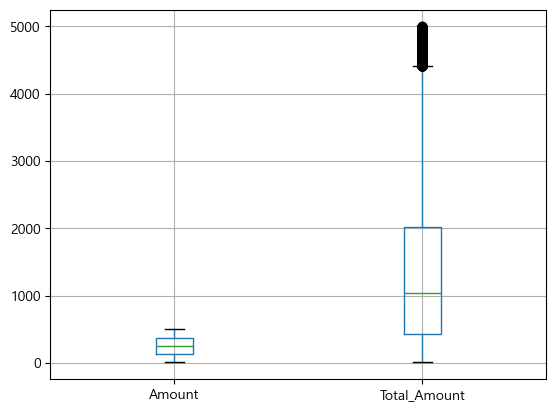

In [18]:
# 이상치 확인
# df_notnull.boxplot(column=['Age'])    # 이상치 없음
# df_notnull.boxplot(column=['Total_Purchases'])    # 이상치 없음
df_notnull.boxplot(column=['Amount', 'Total_Amount'])

In [21]:
q1 = df_notnull['Total_Amount'].quantile(q=0.25)
q3 = df_notnull['Total_Amount'].quantile(q=0.75)
iqr = q3-q1
print('q1 : ', q1)
print('q3 : ', q3)
print('iqr : ', iqr)

q1 :  438.84405165
q3 :  2028.951754
iqr :  1590.10770235


In [22]:
# Total_Amount 값이 이상치인 경우의 데이터만 조회
TA_iqr = df_notnull[df_notnull['Total_Amount'] > q3 + (iqr * 1.5)]
print(len(TA_iqr))
print(TA_iqr['Total_Amount'].min())
print(TA_iqr['Total_Amount'].max())

3816
4414.24078
4999.625796


In [23]:
# 이상치 값을 갖고 있는 데이터 탐색 (3,816개의 데이터)
TA_iqr = TA_iqr.reset_index().iloc[:, 1:]
TA_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    3816 non-null   float64
 1   Customer_ID       3816 non-null   float64
 2   Name              3816 non-null   object 
 3   Email             3816 non-null   object 
 4   Phone             3816 non-null   float64
 5   Address           3816 non-null   object 
 6   City              3816 non-null   object 
 7   State             3816 non-null   object 
 8   Zipcode           3816 non-null   float64
 9   Country           3816 non-null   object 
 10  Age               3816 non-null   float64
 11  Gender            3816 non-null   object 
 12  Income            3816 non-null   object 
 13  Customer_Segment  3816 non-null   object 
 14  Date              3816 non-null   object 
 15  Year              3816 non-null   float64
 16  Month             3816 non-null   object 


In [24]:
TA_iqr[:3]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,4613625.0,72950.0,Gregory Bates,Gerald65@gmail.com,7.785500e+09,3720 Matthew Ville Suite 453,Portsmouth,England,42573.0,UK,51.0,Female,Low,Regular,6/6/2023,2023.0,June,9:03:24,10.0,488.528716,4885.287161,Electronics,Samsung,Television,Average,Same-Day,Debit Card,Pending,2.0,Android TV
1,8093529.0,45413.0,Lauren Johnson,Lisa82@gmail.com,1.816017e+09,0288 Jennifer Spurs Suite 207,Portsmouth,England,24786.0,UK,63.0,Male,Medium,Regular,3/4/2023,2023.0,March,20:54:01,10.0,485.077362,4850.773617,Books,Penguin Books,Children's,Bad,Standard,Debit Card,Delivered,1.0,Art supplies
2,5777205.0,20280.0,Patrick Joseph,Mary8@gmail.com,5.713763e+09,5914 Vargas Loop Apt. 416,Portsmouth,England,4681.0,UK,23.0,Male,Low,Regular,12/5/2023,2023.0,December,13:55:19,10.0,448.712769,4487.127690,Clothing,Zara,Jeans,Average,Same-Day,Debit Card,Delivered,2.0,Distressed jeans


이상치값은 일단 무조건적인 삭제는 하지 않고 계속 분석을 이어가고자 한다.

### 데이터 정제

In [33]:
# 분석에 불필요한 컬럼 제외 (이름, 이메일주소, 전화번호, 주소, 우편번호)
df_notnull = df_notnull.drop(columns=['Name', 'Email', 'Phone', 'Address', 'Zipcode'])
df_notnull[:5]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [34]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293908 non-null  float64
 1   Customer_ID       293908 non-null  float64
 2   City              293908 non-null  object 
 3   State             293908 non-null  object 
 4   Country           293908 non-null  object 
 5   Age               293908 non-null  float64
 6   Gender            293908 non-null  object 
 7   Income            293908 non-null  object 
 8   Customer_Segment  293908 non-null  object 
 9   Date              293908 non-null  object 
 10  Year              293908 non-null  float64
 11  Month             293908 non-null  object 
 12  Time              293908 non-null  object 
 13  Total_Purchases   293908 non-null  float64
 14  Amount            293908 non-null  float64
 15  Total_Amount      293908 non-null  float64
 16  Product_Category  293908 

In [35]:
# 데이터형변환 float64 --> int64
df_notnull = df_notnull.astype({'Transaction_ID': 'int', 'Customer_ID': 'int', 'Age': 'int', 'Year': 'int'})
df_notnull.dtypes

Transaction_ID        int64
Customer_ID           int64
City                 object
State                object
Country              object
Age                   int64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                  int64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [36]:
# 컬럼 이름 변경
df_notnull.rename(columns={'Transaction_ID': 'Transaction_ID(구매번호)',
                           'Customer_ID': 'Customer_ID(고객번호)',
                           'City': 'City(시)',
                           'State': 'State(주)',
                           'Country': 'Country(국가)',
                           'Age': 'Age(나이)',
                           'Gender': 'Gender(성별)',
                           'Income': 'Income(소득수준)',
                           'Customer_Segment': 'Customer_Segment(소비등급)',
                           'Date': 'Date(구매날짜)',
                           'Year': 'Year(연도)',
                           'Month': 'Month(월)',
                           'Time': 'Time(시간)',
                           'Total_Purchases': 'Total_Purchases(총구매수)',
                           'Amount': 'Amount(금액)',
                           'Total_Amount': 'Total_Amount(총구매금액)',
                           'Product_Category': 'Product_Category(카테고리)',
                           'Product_Brand': 'Product_Brand(브랜드)',
                           'Product_Type': 'Product_Type(상품유형)',
                           'Feedback': 'Feedback(피드백)',
                           'Shipping_Method': 'Shipping_Method(배송방법)',
                           'Payment_Method': 'Payment_Method(결제방법)',
                           'Order_Status': 'Order_Status(주문상태)',
                           'Ratings': 'Ratings(평점)',
                           'products': 'products(상품명)'}, inplace=True)

In [37]:
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [39]:
# 수정된 데이터프레임을 csv 파일로 저장
df_notnull.to_csv('./new_retail_data_notnull.csv', index=False)

## 매출 분석

### 1. 소비자 등급 별 매출 분석

이미 지정되어있는 소비자 등급을 기준으로 매출 분석을 수행해보았다.

In [40]:
df_notnull = pd.read_csv('new_retail_data_notnull.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [41]:
# 결측치 및 데이터형 확인
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293908 entries, 0 to 293907
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction_ID(구매번호)    293908 non-null  int64  
 1   Customer_ID(고객번호)       293908 non-null  int64  
 2   City(시)                 293908 non-null  object 
 3   State(주)                293908 non-null  object 
 4   Country(국가)             293908 non-null  object 
 5   Age(나이)                 293908 non-null  int64  
 6   Gender(성별)              293908 non-null  object 
 7   Income(소득수준)            293908 non-null  object 
 8   Customer_Segment(소비등급)  293908 non-null  object 
 9   Date(구매날짜)              293908 non-null  object 
 10  Year(연도)                293908 non-null  int64  
 11  Month(월)                293908 non-null  object 
 12  Time(시간)                293908 non-null  object 
 13  Total_Purchases(총구매수)   293908 non-null  float64
 14  Amount(금액)          

In [42]:
# 소비등급 확인
df_notnull['Customer_Segment(소비등급)'].unique()

array(['Regular', 'Premium', 'New'], dtype=object)

In [43]:
# 소비등급 별 매출
df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().sort_values('Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Customer_Segment(소비등급),
Regular,1.951786e+08
New,1.214222e+08
Premium,8.537248e+07


In [45]:
# 소비등급 별 매출 시각화
a = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=a, x="Customer_Segment(소비등급)", y="Total_Amount(총구매금액)")
plt.title('소비등급별 총 구매금액')

Text(0.5, 1.0, '소비등급별 총 구매금액')

2023년, 2024년을 다 통틀어 소비등급별 총 구매금액에 대해 시각화를 했을 때,\
Regular 등급의 구매금액이 가장 많았다.

In [9]:
# 소비등급 별 최대 구매수 확인
b = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Purchases(총구매수)']].max().reset_index()
b

,Customer_Segment(소비등급),Total_Purchases(총구매수)
0,New,10.0
1,Premium,10.0
2,Regular,10.0
3,Unknown,10.0


In [10]:
pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

,Customer_Segment(소비등급),Total_Amount(총구매금액),Total_Purchases(총구매수)
0,New,1.245976e+08,10.0
1,Premium,8.767392e+07,10.0
2,Regular,1.999656e+08,10.0
3,Unknown,3.285013e+05,10.0


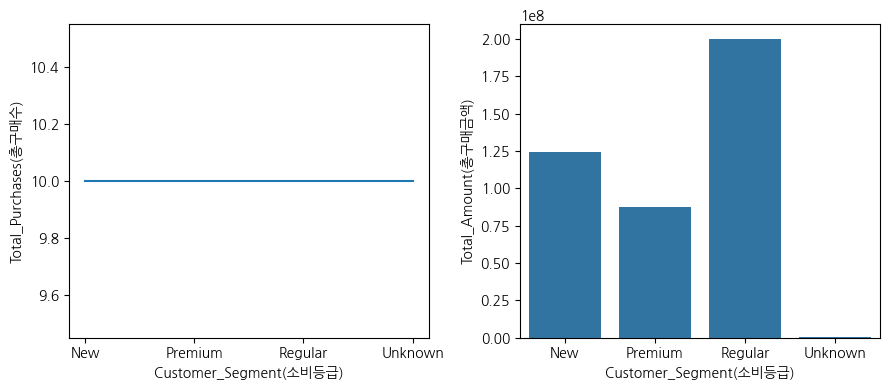

In [11]:
# 소비등급 별 총 구매금액, 최대구매횟수 시각화
c = pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

fig, axes = plt.subplots(figsize=(9, 4), ncols=2, nrows=1)
sns.lineplot(data=c, x='Customer_Segment(소비등급)', y='Total_Purchases(총구매수)', ax=axes[0])
sns.barplot(data=c, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', ax=axes[1])

plt.tight_layout()
plt.show()

Premium 등급의 총 매출이 가장 많을 것이라 생각했으나, Regular 등급의 매출이 가장 높았다.\
구매날짜를 기준으로 하여 년도별, 소비등급별 매출을 살펴보고자 한다.

In [35]:
df_notnull['Year(연도)'].dtype

dtype('int64')

In [56]:
df_notnull['Year(연도)'].unique()

array([2023, 2024,    0])

In [ ]:
# Year(연도) 값이 0인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
for i in range(len(df_notnull)):
    if df_notnull['Year(연도)'][i] == 0:
        df_notnull['Year(연도)'][i] = int(df_notnull['Date(구매날짜)'][i][-4:])

df_notnull[df_notnull['Year(연도)'] == 0]

In [58]:
# 년도별 소비등급별 매출
df_notnull.groupby(['Year(연도)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

,Year(연도),Customer_Segment(소비등급),Total_Amount(총구매금액)
0,2023,New,1.040881e+08
1,2023,Premium,7.323658e+07
2,2023,Regular,1.670900e+08
3,2023,Unknown,2.734215e+05
4,2024,New,2.050952e+07
5,2024,Premium,1.443734e+07
6,2024,Regular,3.287563e+07
7,2024,Unknown,5.507984e+04


Text(0.5, 1.0, '년도별 소비등급별 총 구매금액')

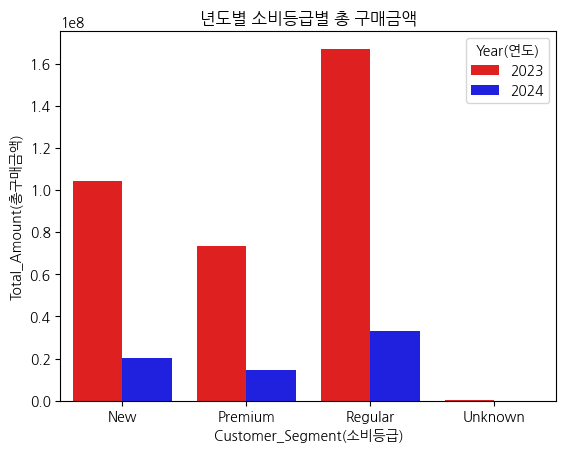

In [88]:
c = df_notnull.groupby(['Year(연도)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()
sns.barplot(data=c, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', hue='Year(연도)', palette=['red', 'blue'])
plt.title('년도별 소비등급별 총 구매금액')

2024년에 비해 2023년도 구매금액이 월등히 많았고, 2024년도 2023년과 동일하게 Regular 등급의 구매금액이 가장 많았다.\
년도별, 월별 구매금액은 어땠는지 알아보고자 한다.

In [76]:
# pd.to_datetime(df_notnull['Date(구매날짜)'][0]).date()
pd.to_datetime(df_notnull['Date(구매날짜)'][0]).strftime('%B')

'September'

In [81]:
# 구매날짜와 월 데이터가 모두 'Unknown' 인 경우
a = df_notnull[df_notnull['Date(구매날짜)'] == 'Unknown']
a[a['Month(월)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
205382,5090991,30625,Calgary,Ontario,Canada,65,Male,Low,Regular,Unknown,2023,Unknown,8:56:02,2.0,77.245802,154.491603,Electronics,Apple,Laptop,Average,Standard,Credit Card,Processing,2.0,Acer Swift


In [ ]:
# Month(월) 값이 Unknown 인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
# df_notnull[df_notnull['Month(월)'] == 'Unknown']
for i in range(len(df_notnull)):
    if df_notnull['Month(월)'][i] == 'Unknown':
        if df_notnull['Date(구매날짜)'][i] != 'Unknown':
            df_notnull['Month(월)'][i] = pd.to_datetime(df_notnull['Date(구매날짜)'][i]).strftime('%B')

In [83]:
df_notnull[df_notnull['Month(월)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
205382,5090991,30625,Calgary,Ontario,Canada,65,Male,Low,Regular,Unknown,2023,Unknown,8:56:02,2.0,77.245802,154.491603,Electronics,Apple,Laptop,Average,Standard,Credit Card,Processing,2.0,Acer Swift


In [86]:
df_notnull[df_notnull['Year(연도)'] == 2024]['Month(월)'].unique()

array(['January', 'February', 'June', 'July', 'August', 'December',
       'April', 'November', 'March', 'October', 'May', 'September'],
      dtype=object)

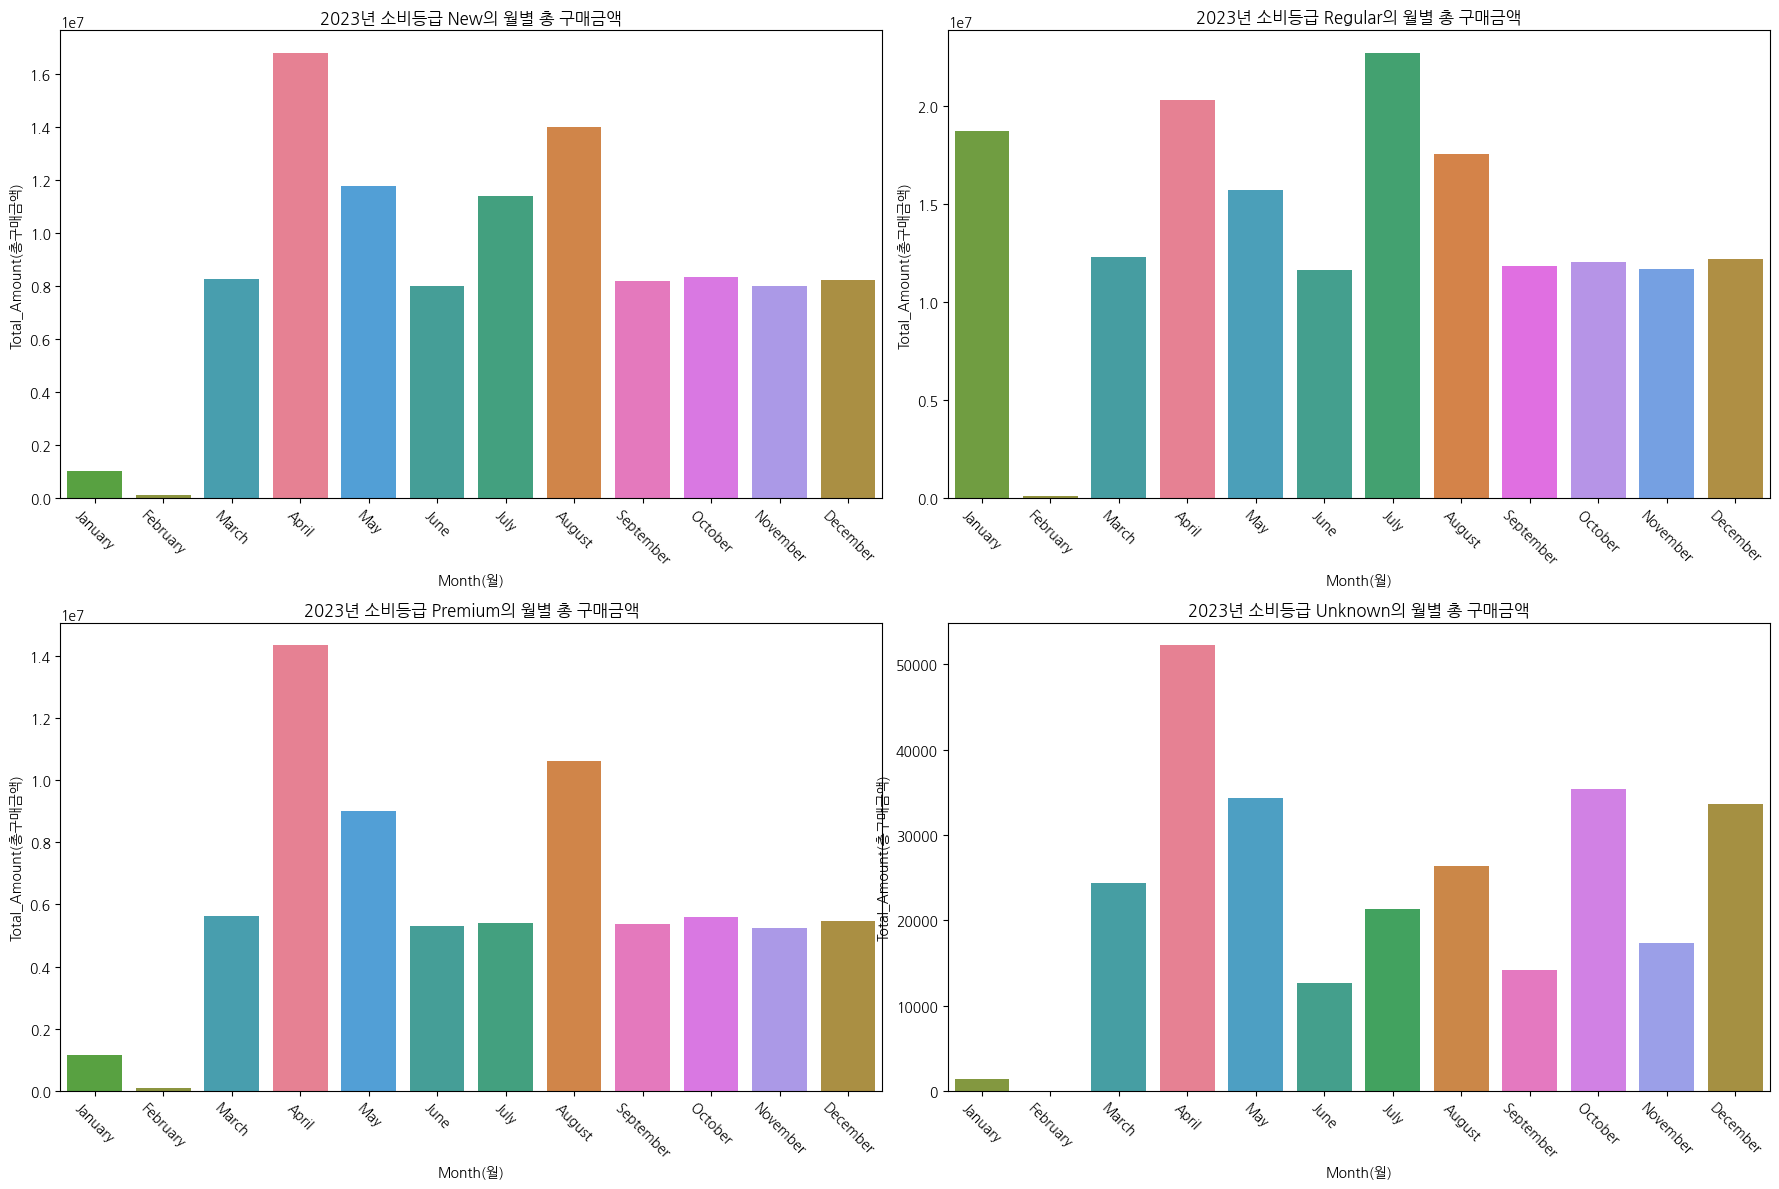

In [112]:
# 2023년 월별, 소비등급별 매출
d = df_notnull[df_notnull['Year(연도)'] == 2023].groupby(['Month(월)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()
# sns.barplot(data=d, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', hue='Month(월)')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,12))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'2023년 소비등급 {seg}의 월별 총 구매금액')

    sns.barplot(data=d[d['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Month(월)')

모든 소비등급이 4월 구매금액이 가장 많았다. (다음으로는 8월, 5월, ...)\
구매금액이 가장 많았던 Regular 등급은 7월, 4월, 1월 순으로 구매금액이 많다.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7856\971713543.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


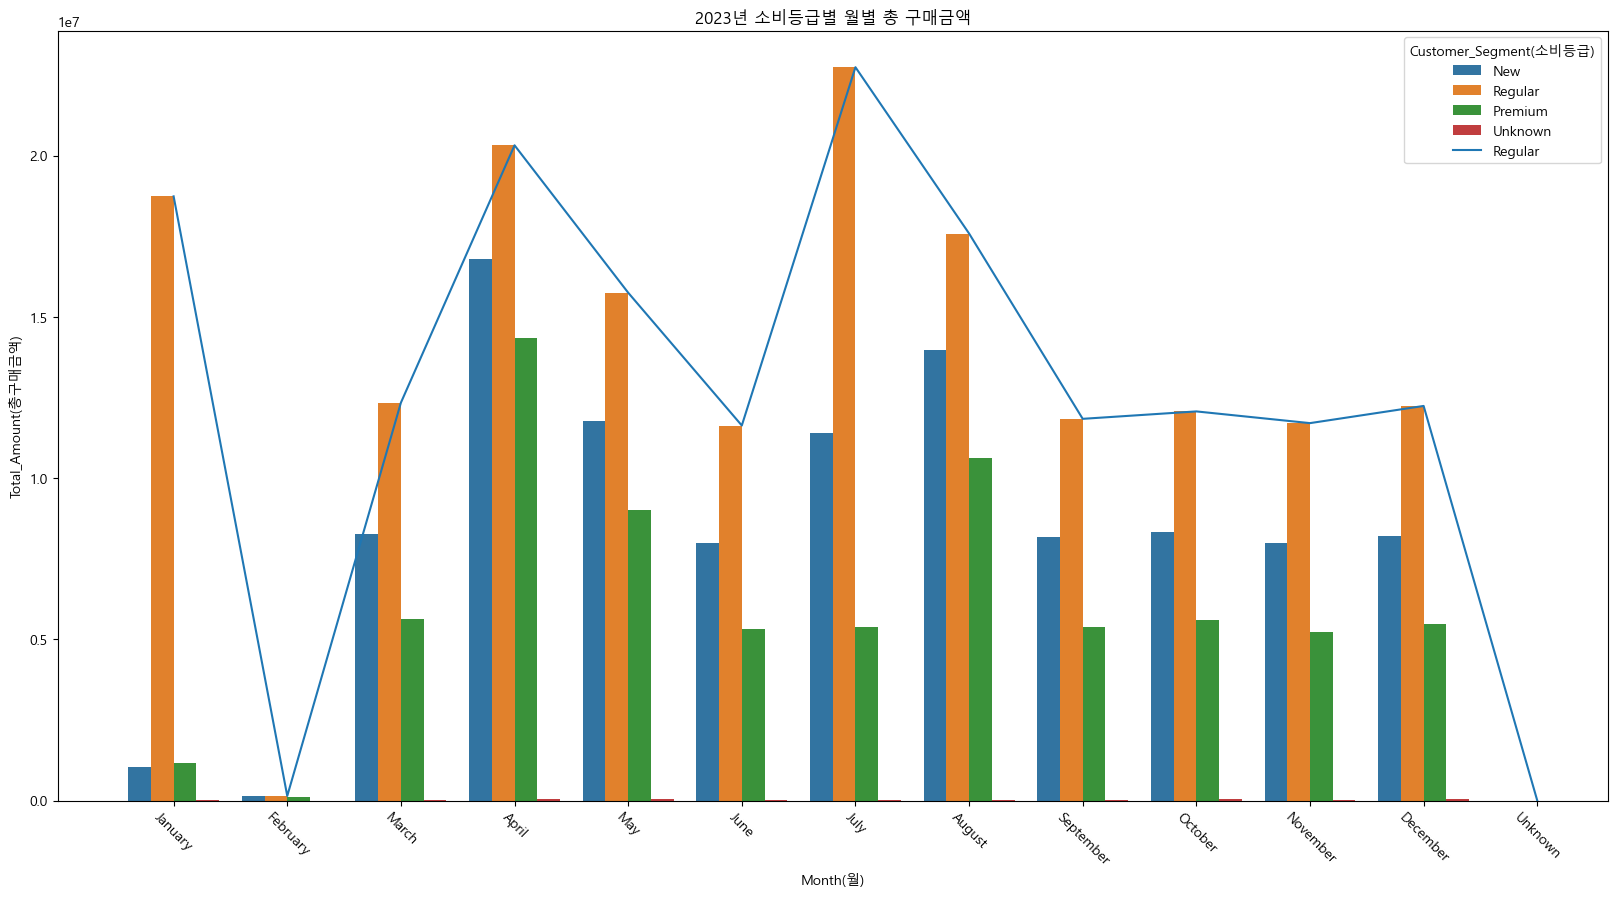

In [53]:
# 2023년의 월을 기준으로 소비등급별 구매금액 비교
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=d, x='Month(월)', y='Total_Amount(총구매금액)', ax=ax,
            hue='Customer_Segment(소비등급)', hue_order=['New', 'Regular', 'Premium', 'Unknown'], order=month_order)
sns.lineplot(data=d, x='Month(월)', y='Total_Amount(총구매금액)', ax=ax,
             hue='Customer_Segment(소비등급)', hue_order=['Regular'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_title('2023년 소비등급별 월별 총 구매금액')
plt.show()

다른 소비등급은 4월의 구매금액이 가장 많았으나, Regular 등급은 7월의 구매금액이 가장 많았던 것으로 보인다.

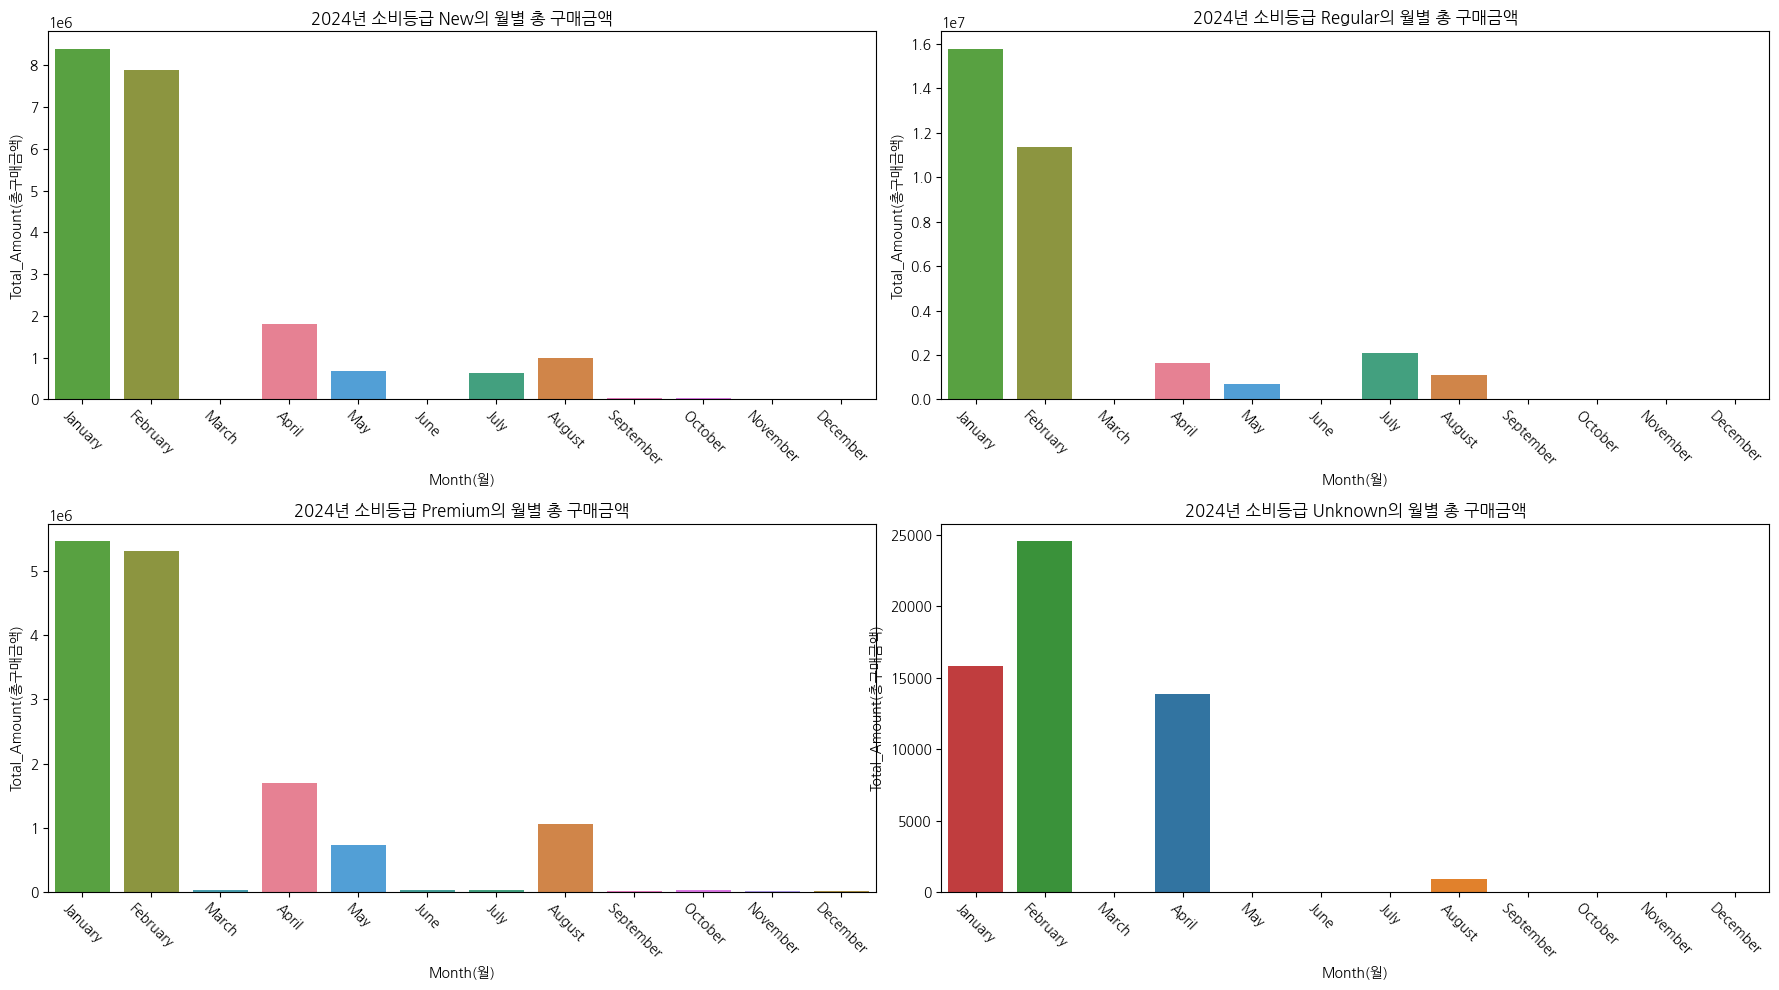

In [105]:
# 2024년 월별, 소비등급별 매출
e = df_notnull[df_notnull['Year(연도)'] == 2024].groupby(['Month(월)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,10))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'2024년 소비등급 {seg}의 월별 총 구매금액')

    sns.barplot(data=e[e['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Month(월)')

2024년도의 매출은 정확한 값이라고 보기는 어려울 것 같다.

In [108]:
df_notnull.groupby(['Customer_Segment(소비등급)', 'Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().reset_index()

,Customer_Segment(소비등급),Year(연도),Month(월),Total_Amount(총구매금액)
0,New,2023,April,1.679113e+07
1,New,2023,August,1.397604e+07
2,New,2023,December,8.209606e+06
3,New,2023,February,1.353320e+05
4,New,2023,January,1.046176e+06
...,...,...,...,...
83,Unknown,2023,September,1.419941e+04
84,Unknown,2024,April,1.382966e+04
85,Unknown,2024,August,9.321975e+02
86,Unknown,2024,February,2.453604e+04


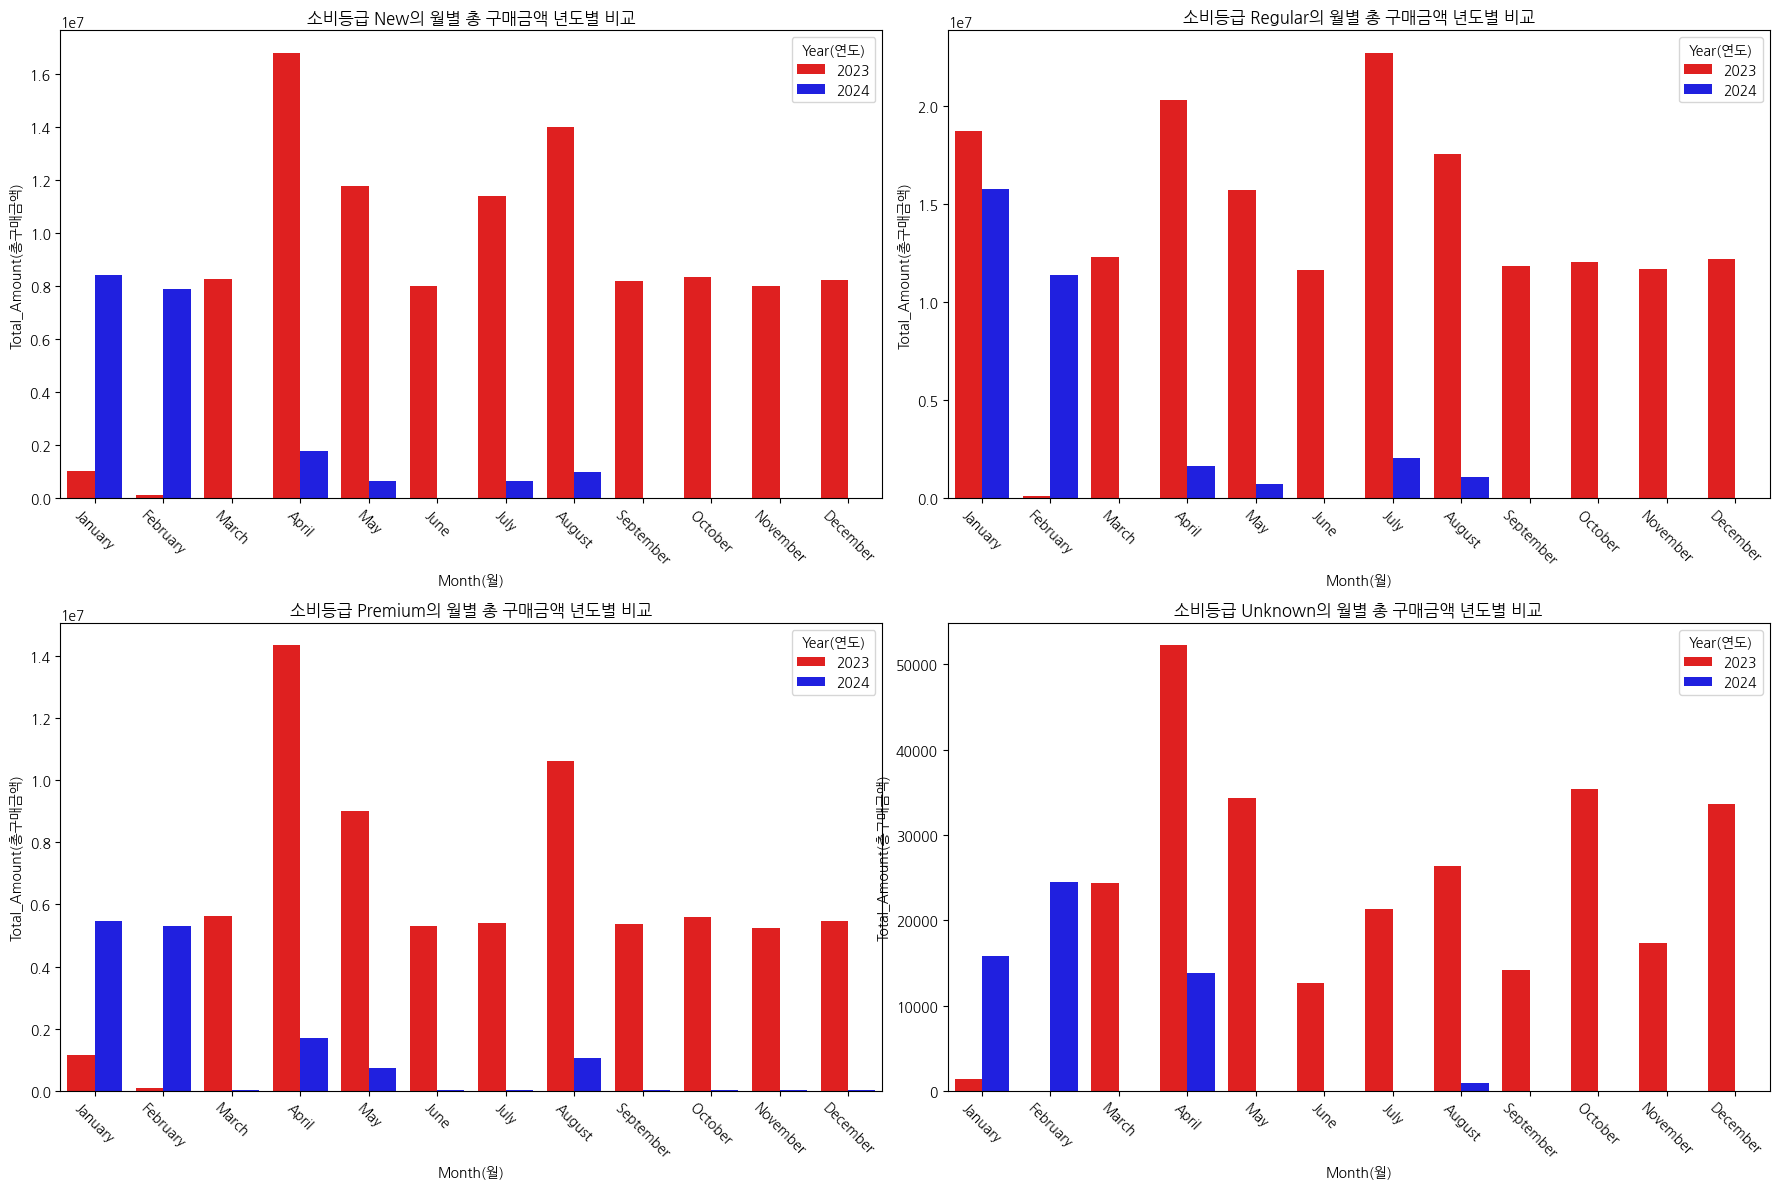

In [113]:
# 월별, 소비등급별 매출 년도별 비교 시각화
f = df_notnull.groupby(['Customer_Segment(소비등급)', 'Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,12))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'소비등급 {seg}의 월별 총 구매금액 년도별 비교')

    sns.barplot(data=f[f['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Year(연도)', palette=['red', 'blue'])

전체적으로 2023년도의 매출에 비해 2024년의 매출이 현저히 낮으며, 이는 현재가 2024년인 것을 생각하면 당연한 결과일 수 있다.\
그럼에도 2024년 1월 ~ 2월의 매출은 전년도에 비해 월등히 높은 것을 볼 수 있다.

<Axes: title={'center': '2023년도 소득수준과 소비등급의 매출 관계'}, xlabel='Customer_Segment(소비등급)', ylabel='Total_Amount(총구매금액)'>

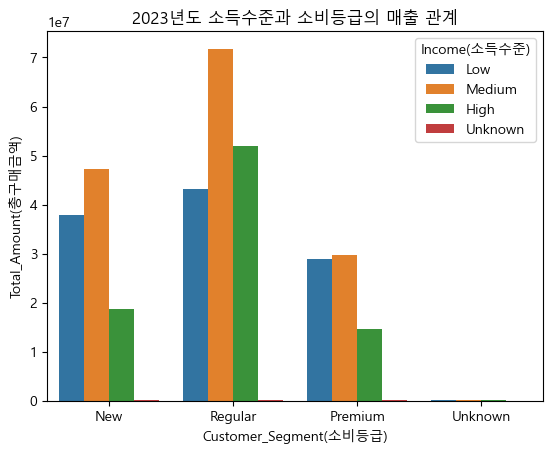

In [41]:
# 2023년도 기준 소득수준과 소비등급의 매출 관계 파악
g = df_notnull[df_notnull['Year(연도)'] == 2023].groupby(['Customer_Segment(소비등급)', 'Income(소득수준)'])[['Total_Amount(총구매금액)']].sum().reset_index()
plt.rc('font', size=10)
plt.title('2023년도 소득수준과 소비등급의 매출 관계')
sns.barplot(data=g, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)',
            hue='Income(소득수준)', hue_order=['Low', 'Medium', 'High', 'Unknown'], order=['New', 'Regular', 'Premium', 'Unknown'])

모든 소비등급에서 소득수준이 medium 인 고객이 소비를 많이 하는 것으로 보이며,\
특히 역시나 Regular 등급에서 소비가 많이 나타난다.

In [55]:
# df_notnull[:5]
# df_notnull[df_notnull['Year(연도)'] == 0]
df_notnull.to_csv('./new_retail_data_notnull_2.csv', index=False)

### 2. 소비등급이 Regular 인 고객들의 데이터

위에서 전반적으로 데이터를 살펴본 결과, 2023년의 데이터가 더 유의미할 것이라고 판단하였고,\
따라서 2023년 데이터를 기준으로 분석을 이어가고자 한다.

In [4]:
df_notnull = pd.read_csv('new_retail_data_notnull_2.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [5]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction_ID(구매번호)    302010 non-null  int64  
 1   Customer_ID(고객번호)       302010 non-null  int64  
 2   City(시)                 302010 non-null  object 
 3   State(주)                302010 non-null  object 
 4   Country(국가)             302010 non-null  object 
 5   Age(나이)                 302010 non-null  int64  
 6   Gender(성별)              302010 non-null  object 
 7   Income(소득수준)            302010 non-null  object 
 8   Customer_Segment(소비등급)  302010 non-null  object 
 9   Date(구매날짜)              302010 non-null  object 
 10  Year(연도)                302010 non-null  int64  
 11  Month(월)                302010 non-null  object 
 12  Time(시간)                302010 non-null  object 
 13  Total_Purchases(총구매수)   302010 non-null  float64
 14  Amount(금액)          

In [24]:
# 2023년 소비등급이 Regular인 고객들의 데이터
df_notnull_2023 = df_notnull[df_notnull['Year(연도)'] == 2023]
regular = df_notnull_2023[df_notnull_2023['Customer_Segment(소비등급)'] == 'Regular'].reset_index().iloc[:, 1:]
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,UK,64,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [66]:
# 소비등급이 Regular인 고객들의 평점
# regular.groupby(['Ratings(평점)'])[['Ratings(평점)']].count()
a = regular.groupby(['Ratings(평점)'])[['Transaction_ID(구매번호)']].count().reset_index()
a.rename(columns={'Transaction_ID(구매번호)' : 'count'}, inplace=True)

# 소비등급이 Regular인 고객들의 피드백 별 총 구매금액
b = regular.groupby('Feedback(피드백)')[['Total_Amount(총구매금액)']].sum().reset_index()

# 소비등급이 Regular인 고객들의 성별 총 구매금액
c = regular.groupby('Gender(성별)')[['Total_Amount(총구매금액)']].sum().reset_index()

([<matplotlib.patches.Wedge at 0x2414de85550>,
 [Text(0.4548324623786949, 1.0015624948881288, 'Female'),
  Text(-0.45802412649480967, -1.000106944055818, 'Male'),
  Text(1.0999944069666403, -0.0035077973301202003, 'Unknown')],
 [Text(0.24809043402474265, 0.5463068153935248, '36.4%'),
  Text(-0.2498313417244416, -0.5455128785759006, '63.5%'),
  Text(0.5999969492545311, -0.0019133439982473815, '0.1%')])

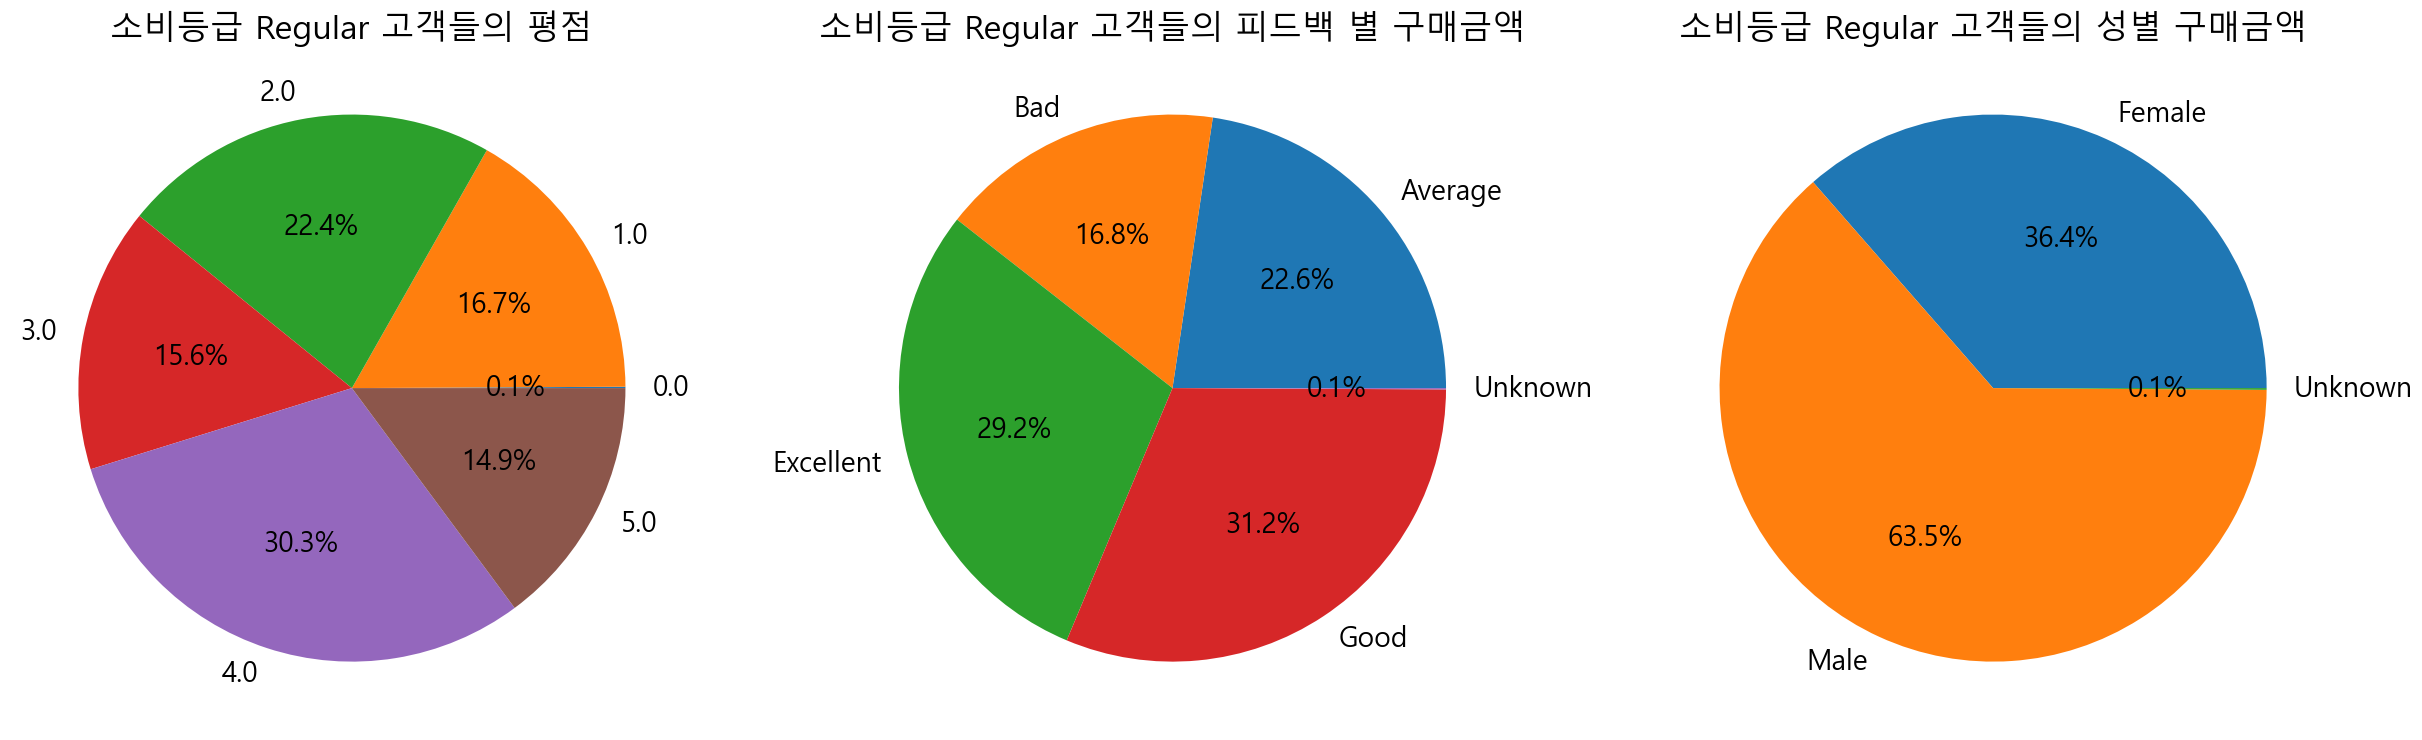

In [72]:
fig, axs = plt.subplots(figsize=(30,10), ncols = 3, nrows=1)
plt.rc('font', size=20)
axs[0].set_title('소비등급 Regular 고객들의 평점')
axs[0].pie(data=a, x='count', labels='Ratings(평점)', autopct='%.1f%%')

axs[1].set_title('소비등급 Regular 고객들의 피드백 별 구매금액')
axs[1].pie(data=b, x='Total_Amount(총구매금액)', labels='Feedback(피드백)', autopct='%.1f%%')

axs[2].set_title('소비등급 Regular 고객들의 성별 구매금액')
axs[2].pie(data=c, x='Total_Amount(총구매금액)', labels='Gender(성별)', autopct='%.1f%%')

In [13]:
# 소비등급이 Regular인 고객들의 나이별 총 구매금액
regular.groupby(['Age(나이)'])[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:5]

,Total_Amount(총구매금액)
Age(나이),
22,2.853114e+07
26,2.485344e+07
23,1.839983e+07
20,1.533136e+07
46,1.434075e+07


In [30]:
print(len(regular['Age(나이)'].unique()))
regular['Age(나이)'].unique()

54


array([21, 48, 64, 31, 53, 32, 43, 69, 19, 46, 61, 41, 59, 20, 50, 56, 66,
       24, 54, 65, 68, 58, 36, 57, 27, 35, 38, 67, 29, 26, 34, 25, 37, 30,
       39, 47, 18, 49, 60, 33, 62, 42, 51, 70, 63, 55, 23, 40, 52, 28, 44,
       45, 22,  0])

In [32]:
# 나이값을 기준으로 연령대 컬럼을 생성하여 추가
regular['Age_Group(연령대)'] = np.where(regular['Age(나이)'] < 20, '10대',
                                     np.where(regular['Age(나이)'] < 30, '20대',
                                              np.where(regular['Age(나이)'] < 40, '30대',
                                                       np.where(regular['Age(나이)'] < 50, '40대',
                                                                np.where(regular['Age(나이)'] < 60, '50대',
                                                                         np.where(regular['Age(나이)'] < 70, '60대',
                                                                                  np.where(regular['Age(나이)'] < 80, '70대', '80~90대')))))))

age_g = regular.pop('Age_Group(연령대)')
regular.insert(6, 'Age_Group(연령대)', age_g)
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Age_Group(연령대),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,20대,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,Australia,48,40대,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,UK,64,60대,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [36]:
# 나이대별, 성별 총 구매금액
pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', index='Age_Group(연령대)', columns='Gender(성별)', aggfunc='sum')

Gender(성별),Female,Male,Unknown
Age_Group(연령대),,,
10대,4.740917e+06,7.275376e+06,5060.193531
20대,2.948826e+07,5.821990e+07,74800.853248
30대,7.257040e+06,1.115199e+07,10720.331804
40대,9.330971e+06,1.378885e+07,32232.162651
50대,5.057152e+06,7.906470e+06,24629.455843
60대,4.526516e+06,6.945629e+06,22005.211817
70대,4.719852e+05,7.593409e+05,147.471132


<Axes: title={'center': '소비등급 Regular 고객들의 성별, 연령대별 총 구매금액'}, xlabel='Age_Group(연령대)', ylabel='Total_Amount(총구매금액)'>

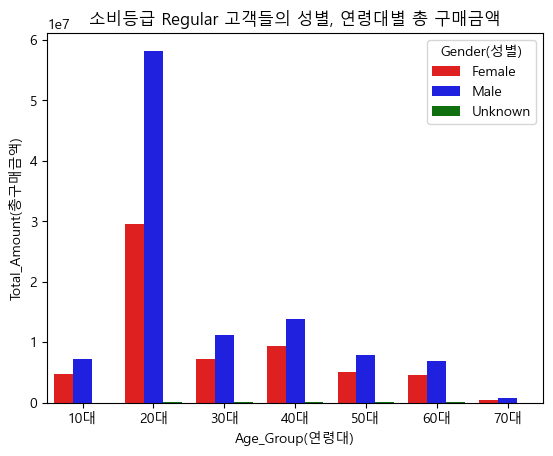

In [43]:
c = regular.groupby(['Gender(성별)', 'Age_Group(연령대)'])[['Total_Amount(총구매금액)']].sum().reset_index()
plt.rc('font', size=10)
plt.title('소비등급 Regular 고객들의 성별, 연령대별 총 구매금액')
sns.barplot(data=c, x='Age_Group(연령대)', y='Total_Amount(총구매금액)', hue='Gender(성별)', palette=['red', 'blue', 'green'])

In [73]:
regular['Country(국가)'].unique()

array(['Germany', 'Australia', 'UK', 'Canada', 'USA', 'Unknown'],
      dtype=object)

In [45]:
print(len(regular['State(주)'].unique()))
regular['State(주)'].unique()

55


array(['Berlin', 'New South Wales', 'England', 'Ontario', 'New Hampshire',
       'Arizona', 'Indiana', 'Iowa', 'Illinois', 'New Mexico', 'Ohio',
       'Connecticut', 'South Carolina', 'Wisconsin', 'New York',
       'Delaware', 'Pennsylvania', 'Oklahoma', 'Georgia', 'Maine',
       'Massachusetts', 'Michigan', 'Rhode Island', 'Montana', 'Missouri',
       'West Virginia', 'Louisiana', 'Nebraska', 'Kansas', 'Kentucky',
       'Minnesota', 'Washington', 'Unknown', 'New Jersey', 'South Dakota',
       'California', 'Alaska', 'Colorado', 'Alabama', 'Idaho', 'Utah',
       'Arkansas', 'Mississippi', 'Hawaii', 'Texas', 'North Carolina',
       'Tennessee', 'Maryland', 'Virginia', 'Vermont', 'Florida',
       'Wyoming', 'Nevada', 'North Dakota', 'Oregon'], dtype=object)

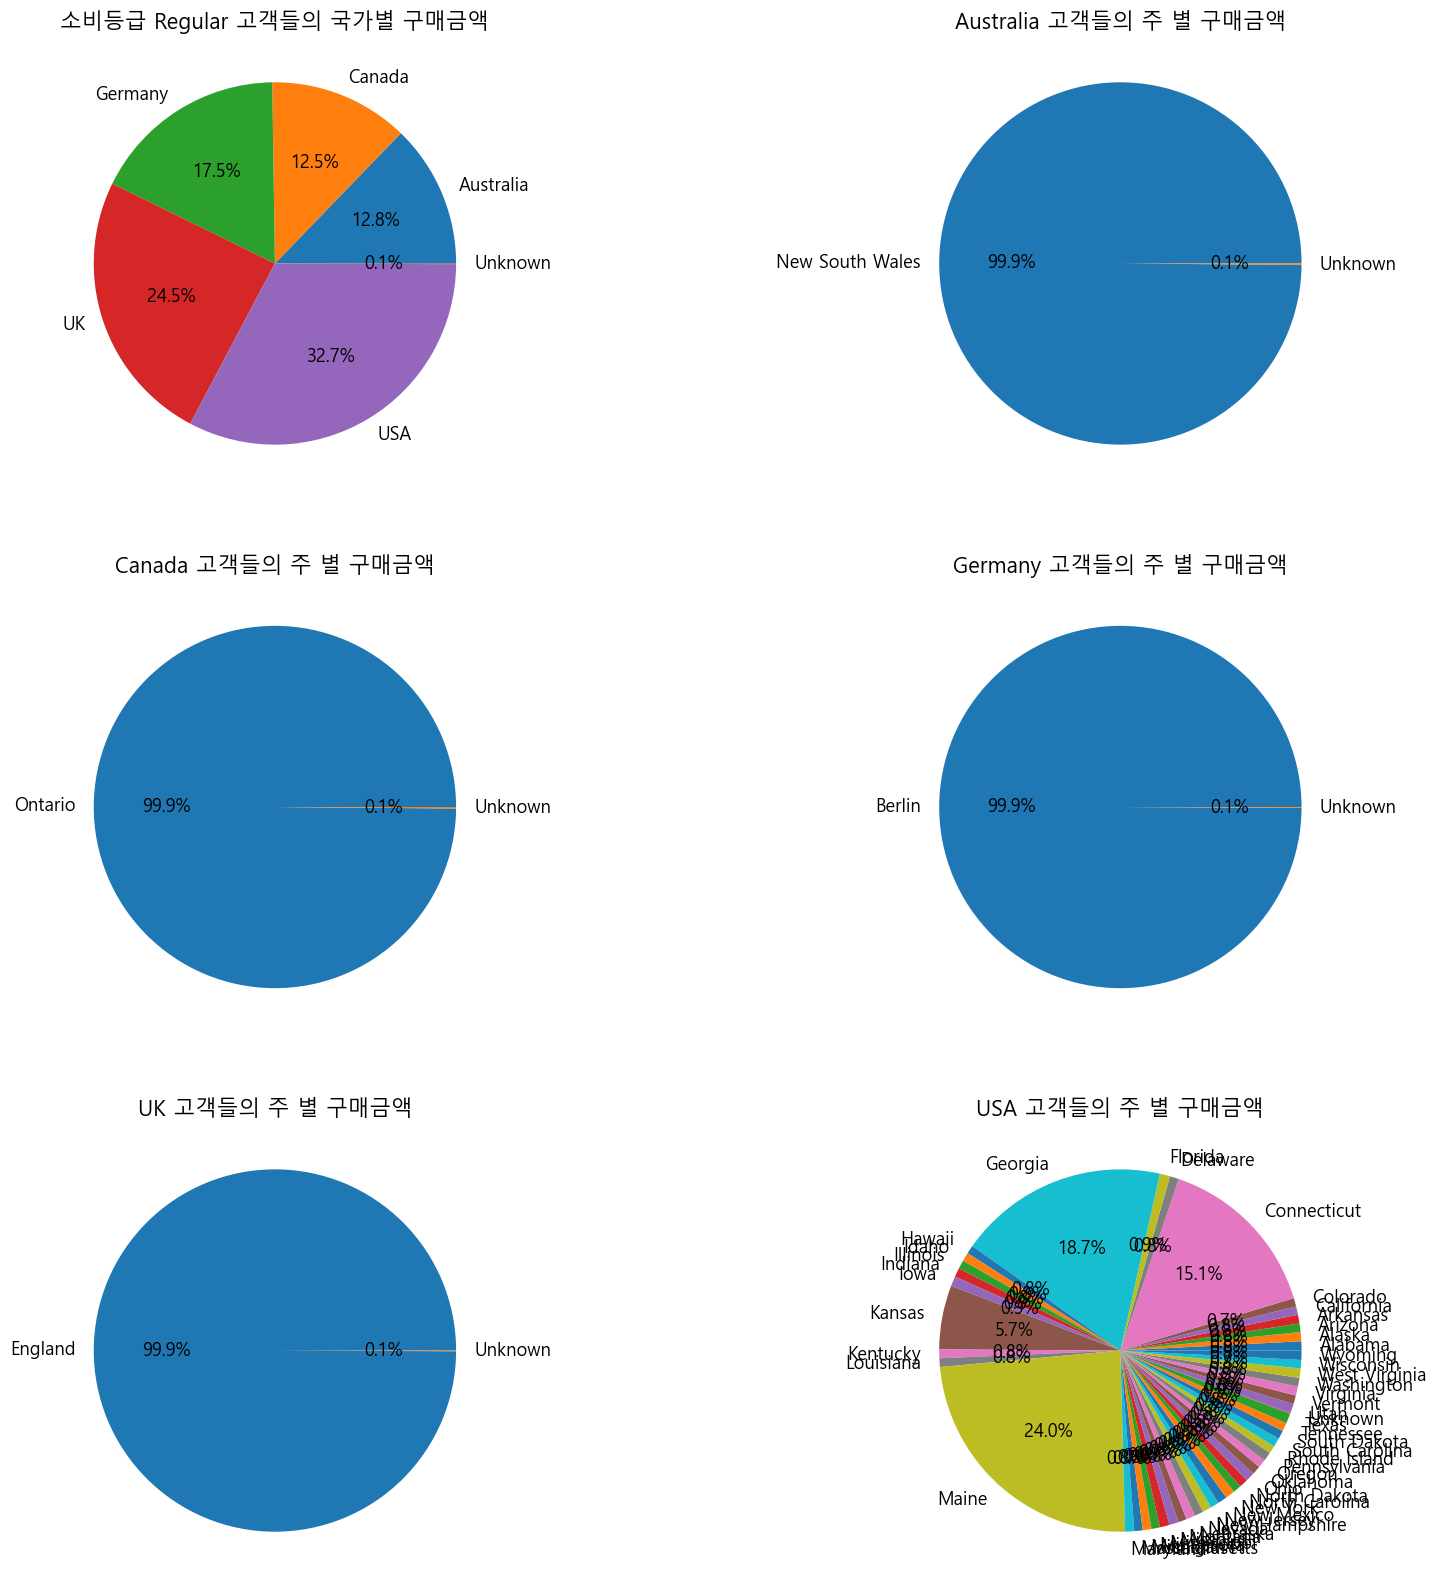

In [85]:
# 소비등급 Regular인 사람들의 국가별, 주별 매출비교
d = regular.groupby('Country(국가)')[['Total_Amount(총구매금액)']].sum().reset_index()
e = regular.groupby(['Country(국가)', 'State(주)'])[['Total_Amount(총구매금액)']].sum().reset_index()
contries = ['Australia', 'Canada', 'Germany', 'UK', 'USA']

fig, axs = plt.subplots(figsize=(20,20), ncols = 2, nrows=3)
plt.rc('font', size=13)
axs[0,0].set_title('소비등급 Regular 고객들의 국가별 구매금액')
axs[0,0].pie(data=d, x='Total_Amount(총구매금액)', labels='Country(국가)', autopct='%.1f%%')

for i, contry in enumerate(contries):
    row = int((i+1)/2)
    col = (i+1)%2
    df = e[e['Country(국가)'] == contry]
    axs[row,col].set_title(f'{contry} 고객들의 주 별 구매금액')
    axs[row,col].pie(data=df, x='Total_Amount(총구매금액)', labels='State(주)', autopct='%.1f%%')

<BarContainer object of 51 artists>

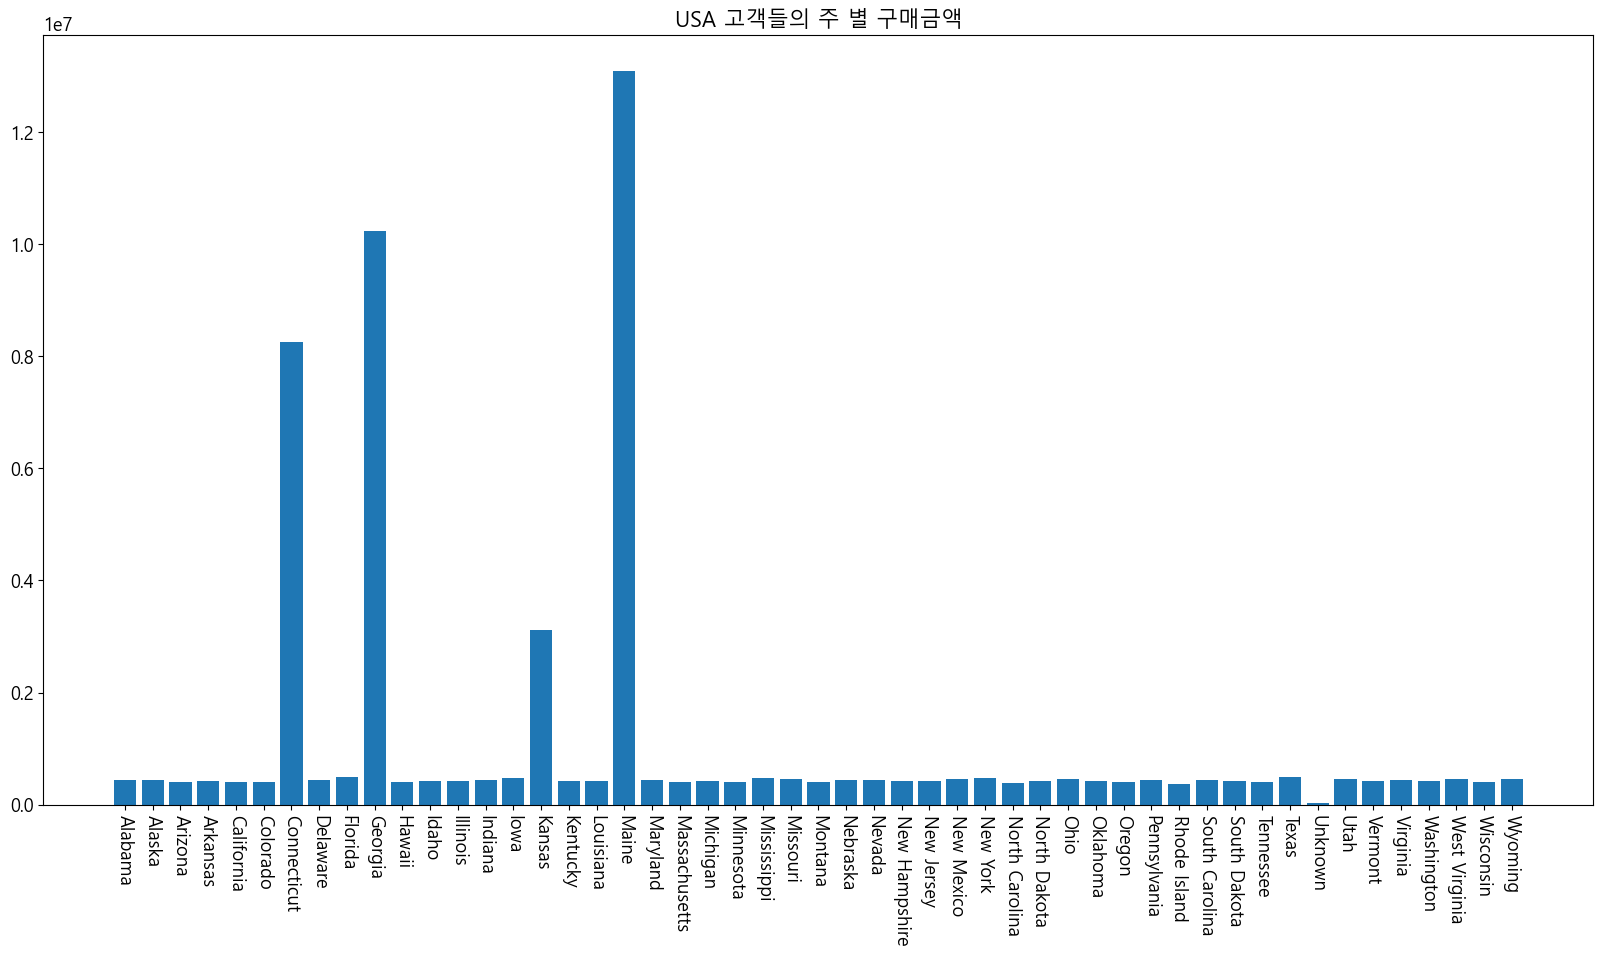

In [109]:
e = regular.groupby(['Country(국가)', 'State(주)'])[['Total_Amount(총구매금액)']].sum().reset_index()

plt.subplots(figsize=(20,10))
plt.rc('font', size=13)
plt.xticks(rotation=-90)
plt.title('USA 고객들의 주 별 구매금액')
plt.bar(data=e[e['Country(국가)'] == 'USA'], x='State(주)', height='Total_Amount(총구매금액)')

In [114]:
!pip install plotly

^C


In [118]:
import plotly.express as px

e1 = regular[regular['Country(국가)'] == 'USA'].groupby('State(주)')[['Customer_ID(고객번호)']].count().reset_index()
e1.rename(columns={'Customer_ID(고객번호)' : 'count'}, inplace=True)

# plt.scatter(data=e1, x='State(주)', y='Customer_ID(고객번호)', s='pop', alpha=0.5, c='blue')
fig = px.scatter(data_frame=e1, x='State(주)', y='count', color='State(주)',
                 hover_name='State(주)', size='count', size_max=50)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [91]:
# 상품 카테고리별, 브랜드별 매출 비교
# regular.groupby('Product_Category(카테고리)')[['Total_Amount(총구매금액)']].sum().reset_index()
# regular.groupby('Product_Brand(브랜드)')[['Total_Amount(총구매금액)']].sum().reset_index()
regular.groupby('Product_Type(상품유형)')[['Total_Amount(총구매금액)']].sum().reset_index()

,Product_Type(상품유형),Total_Amount(총구매금액)
0,Bathroom,3.425122e+06
1,Bedding,3.479322e+06
2,BlueStar AC,8.244586e+05
3,Children's,3.448665e+06
4,Chocolate,3.373218e+06
5,Coffee,3.469964e+06
6,Decorations,6.719983e+06
7,Dress,3.403489e+06
8,Fiction,1.015084e+07
9,Fridge,7.225792e+06


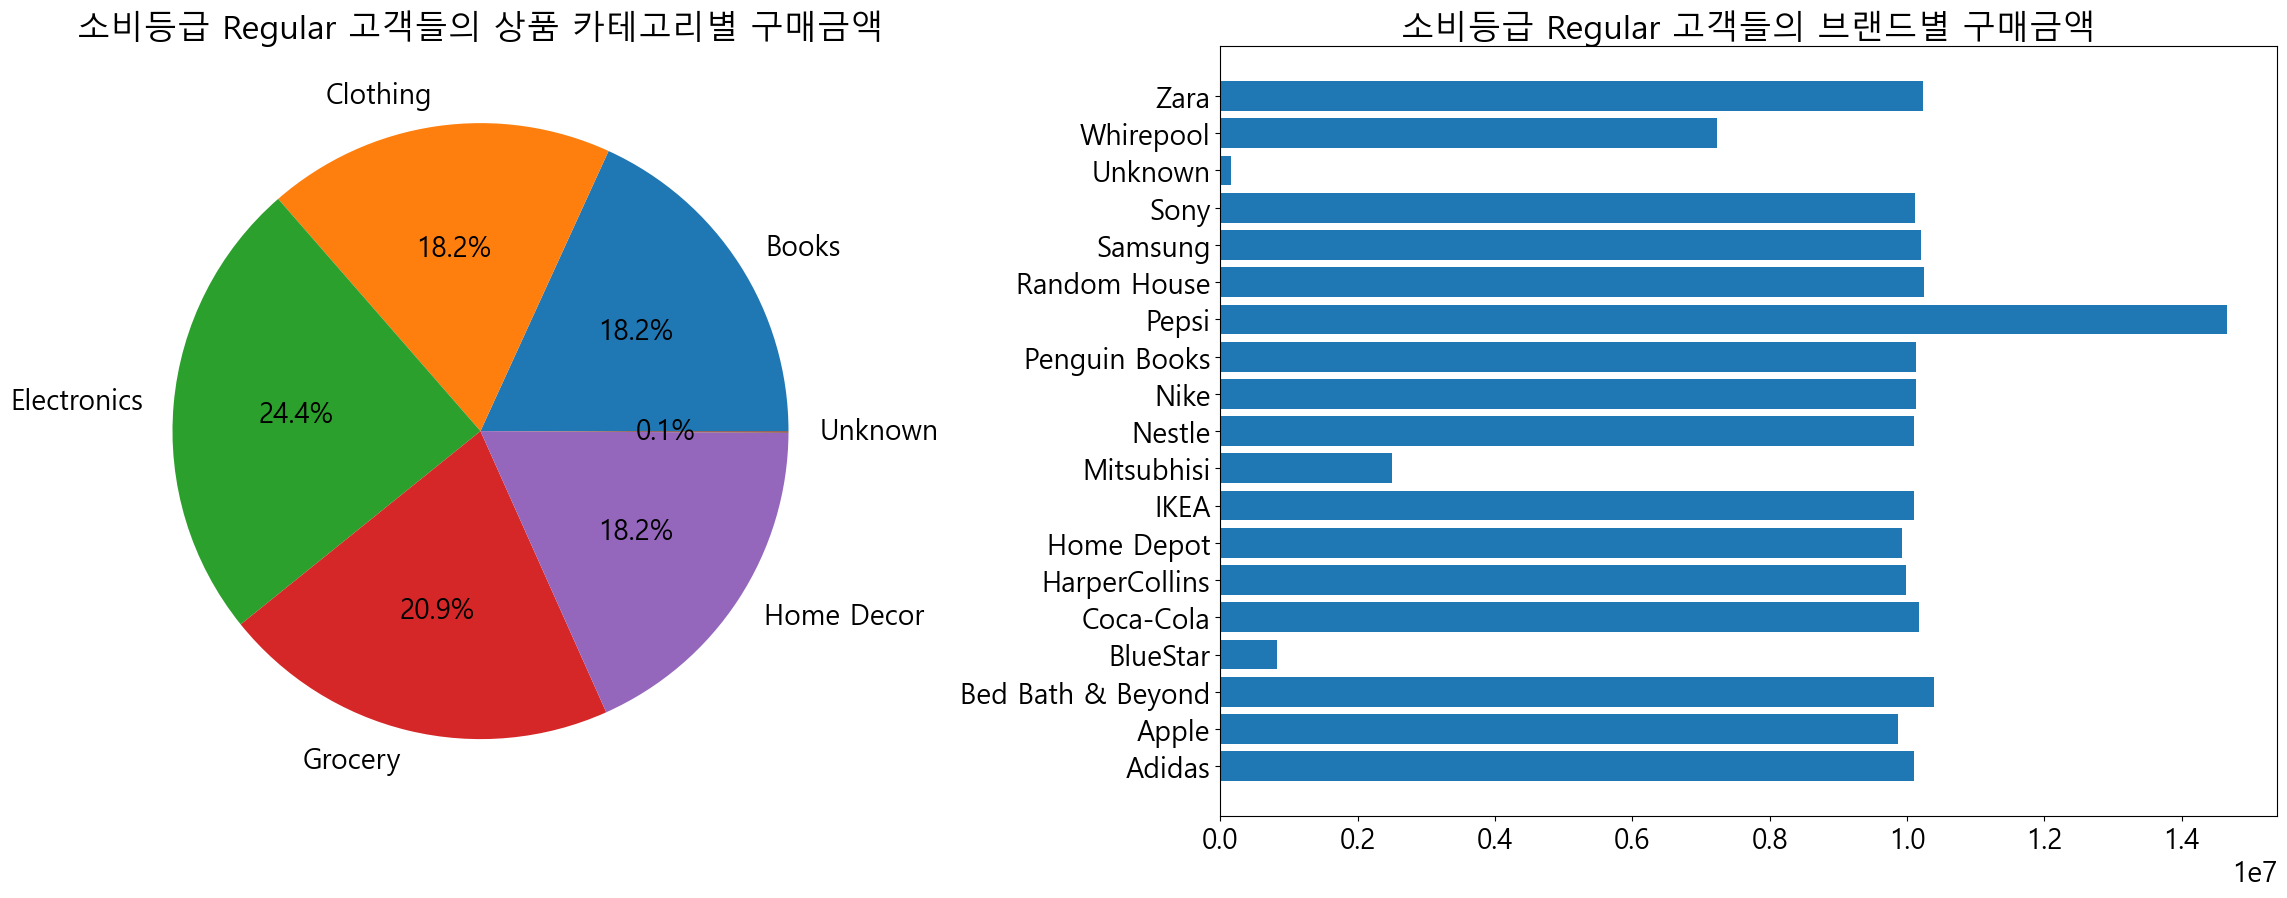

In [101]:
# 2023년 브랜드별, 상품별 매출 비교
f = regular.groupby('Product_Category(카테고리)')[['Total_Amount(총구매금액)']].sum().reset_index()
g = regular.groupby('Product_Brand(브랜드)')[['Total_Amount(총구매금액)']].sum().reset_index()

fig, axs = plt.subplots(figsize=(30,10), ncols = 2, nrows=1)
plt.rc('font', size=20)
axs[0].set_title('소비등급 Regular 고객들의 상품 카테고리별 구매금액')
axs[0].pie(data=f, x='Total_Amount(총구매금액)', labels='Product_Category(카테고리)', autopct='%.1f%%')

axs[1].set_title('소비등급 Regular 고객들의 브랜드별 구매금액')
axs[1].barh(data=g, y='Product_Brand(브랜드)', width='Total_Amount(총구매금액)')

plt.show()